# <font color='lightblue'>Predicting Heart Disease Using Personal Health and Lifestyle Indicators</font>

## <font color='lightblue'>1. Overview </font>


The question we will be exploring is:
Can we accurately predict whether an individual is at risk of developing heart disease based on their personal health and lifestyle indicators?

The goal is to build a predictive model that identifies individuals at high risk of heart disease, enabling early interventions and promoting preventive healthcare decisions.

The dataset used is heart_2020_cleaned.csv, obtained from Kaggle’s “Personal Key Indicators of Heart Disease”, which contains 319,795 survey responses collected through the CDC’s Behavioral Risk Factor Surveillance System (BRFSS). Each record represents an individual’s self-reported responses on health and lifestyle indicators such as BMI, Smoking, Alcohol Drinking, Physical and Mental Health, Sleep Time, and demographic factors like Sex and Age Category. The target variable is HeartDisease (Yes/No).

In terms of reliability and validity, the dataset is considered strong as it originates from the CDC, ensuring a well-designed sampling process and consistent data collection across the U.S. adult population, making it representative and generalizable.

However, since the data is self-reported, accuracy may be affected due to underreporting, recall bias, or misinterpretation of survey questions. Moreover, there is a class imbalance, with only about 8.6% of participants having heart disease, which may impact model learning and prediction performance.


The problem we are addressing is predicting whether an individual is at risk of developing heart disease, which is a supervised machine learning problem. In supervised learning, the model is trained on labeled data, in this case, various health and lifestyle indicators (features) and a target variable (HeartDisease) labeled as “Yes” or “No.”

Since the target variable has two categories, this is a binary classification task, where the goal is to classify individuals as either having heart disease or not.

We used two classification models:

Logistic Regression – chosen for its simplicity, interpretability, and ability to estimate the probability of heart disease based on linear relationships between predictors.

Decision Tree Classifier – used to capture non-linear relationships and provide a clear, visual understanding of decision rules.

Overall, this approach helps not only predict heart disease risk but also understand which health and lifestyle factors contribute most to it.

Importing required python libraries


## <font color='lightblue'>2. Exploratory Data Analysis - Data understanding, cleaning, exploration, and visualization </font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

Import your data into colaboratory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_heart_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/heart_2020_cleaned.csv')

In [ ]:
print("First 4 rows of the dataset:")
df_heart_data.head(4)

First 4 rows of the dataset:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes


In [ ]:
print("Last 4 entries of the dataset:")
df_heart_data.tail(4)

Last 4 entries of the dataset:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


The types of data are you dealing with & handle missing data (if there is any!).

In [ ]:
print('The shape of the dataset:')
df_heart_data.shape

The shape of the dataset:


(319795, 18)

The dataset contains 319,795 rows and 18 columns.

Each row represents an individual respondent in the survey.

The 18 columns represent variables that capture health status, demographics, and lifestyle behaviors.

In [ ]:
print('The data types all the columns:')
df_heart_data.dtypes

The data types all the columns:


,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


The data consist of numerical and categorical columns. The details about it are given below:

In [ ]:
# Numeric variables
numeric_vars = df_heart_data.columns[(df_heart_data.dtypes == 'int64') | (df_heart_data.dtypes == 'float64')].tolist()

# Categorical variables
categorical_vars = df_heart_data.columns[df_heart_data.dtypes == 'object'].tolist()

print("Total number of Numeric Variables:", len(numeric_vars))
print("Numeric Variables:", numeric_vars)

print("Total number of Categorical Variables:",  len(categorical_vars))
print("Categorical Variables:", categorical_vars)

Total number of Numeric Variables: 4
Numeric Variables: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Total number of Categorical Variables: 14
Categorical Variables: ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


The dataset consists of 4 numeric variables and 14 categorical variables:

**Numeric Variables:** BMI, PhysicalHealth, MentalHealth, SleepTime
These are continuous or discrete measures that allow for descriptive statistics (mean, median, standard deviation) and correlation analysis.

**Categorical Variables:** HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer
These represent qualitative characteristics such as health conditions, demographics, and lifestyle behaviors. They are primarily nominal or ordinal.

In [ ]:
#determining if there are any missing variables:

print('The number of missing values in the dataset:')
df_heart_data.isnull().sum()

The number of missing values in the dataset:


,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


The dataset contains no missing values across all variables. This is an important first step in data quality assessment because missing data can bias results or reduce the representativeness of findings. Since all variables are complete, we can proceed directly with summary statistics and visualization without needing imputation or data cleaning for null values.

Estimate the summary statistics of some of the key variables.

In [ ]:
#all kind of the statistic data of the numerical columns:

print("Summary Statistics of the Numerical Variables:")
df_heart_data.describe()


Summary Statistics of the Numerical Variables:


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


The summary statistics highlight several important trends in the dataset. The average BMI of approximately 28.3 suggests that overweight and obesity are common within this population, which aligns with broader public health concerns. The distribution shows variability (std approximately 6.36) and a wide range (12 to 94), indicating both underweight and severely obese individuals are represented.

For both PhysicalHealth and MentalHealth, the median value is 0, meaning that most respondents report no poor health days in the past month. However, the high standard deviation (approximately 7.95) and the maximum of 30 days suggest that a subgroup of the population experiences persistent physical or mental health challenges. This creates a skewed distribution: while most individuals appear healthy, a vulnerable subset is facing significant issues. These extremes may represent true cases of chronic illness or mental health struggles, but they could also be influenced by self-reporting biases or individual differences in interpreting the survey questions.

SleepTime is more consistent, with a mean of around 7 hours and a relatively low standard deviation (approximately 1.4). This is in line with recommended sleep guidelines. Nonetheless, extreme values such as 1 hour or 24 hours suggest possible data entry errors, misreporting (e.g., reporting time in bed rather than sleep), or rare cases of sleep disorders.

Overall, the data illustrate realistic health patterns, but the presence of skewness and outliers highlights the need for careful consideration. These irregularities may either indicate genuine subgroups of interest, such as individuals with chronic health conditions, or may simply reflect limitations of self-reported survey data.

In [ ]:
#proportion of people with heart disease:
heart_disease_counts = df_heart_data['HeartDisease'].value_counts()

print('Heart Disease Counts:')
print(heart_disease_counts)

#proportion of people having heart disease
heart_disease_proportion = heart_disease_counts / len(df_heart_data)

print('\nProportion :\n',heart_disease_proportion)

Heart Disease Counts:
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

Proportion :
 HeartDisease
No     0.914405
Yes    0.085595
Name: count, dtype: float64


The dataset shows that out of 319,795 individuals, 27,373 (8.6%) reported having heart disease, while the vast majority, 292,422 (91.4%) reported no heart disease. This indicates that heart disease is relatively less common in this population sample.

However, the proportion of nearly 1 in 12 people with heart disease is still significant from a public health perspective. It suggests that while most individuals in the dataset are free from diagnosed heart disease, a notable subgroup is affected.

In [ ]:
print('Grouped summary statistics for BMI and heart:')
df_heart_data.groupby('HeartDisease')['BMI'].describe()




Grouped summary statistics for BMI and heart:


,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
No,292422.0,28.224658,6.325660,12.02,23.89,27.26,31.32,94.85
Yes,27373.0,29.401592,6.577151,12.21,25.06,28.34,32.69,83.33


The grouped summary statistics for BMI show that individuals with heart disease tend to have higher BMI values compared to those without the condition. The mean BMI is 29.40 for people with heart disease, compared to 28.22 for those without, and the median follows a similar trend (28.34 vs. 27.26). The interquartile range also shifts slightly higher for the heart disease group, suggesting that overweight and obesity are more common among them. While the overall spread of BMI is similar across both groups, with some extreme outliers present, the consistent upward shift indicates that higher BMI may be associated with an increased risk of heart disease. However, since there is considerable overlap between the groups, BMI alone cannot be considered a definitive predictor, but rather one of several contributing factors.

In [ ]:
print('Grouped summary statistics for physical health and heart')
df_heart_data.groupby('HeartDisease')['PhysicalHealth'].describe()

Grouped summary statistics for physical health and heart


,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
No,292422.0,2.956416,7.400378,0.0,0.0,0.0,1.0,30.0
Yes,27373.0,7.808242,11.487819,0.0,0.0,0.0,15.0,30.0


The grouped summary statistics for physical health (measured as the number of days in the past month when physical health was not good) show a clear difference between individuals with and without heart disease. On average, people without heart disease report about 3 days of poor physical health, whereas those with heart disease report nearly 8 days. The median for both groups is 0 days, which suggests that at least half of the individuals in each group did not report any recent physical health issues. However, the upper quartile (75%) shows a major difference: people without heart disease report only 1 day, while those with heart disease report up to 15 days, highlighting a substantial shift. The standard deviation is also much higher in the heart disease group (11.49 vs. 7.40), indicating greater variability.

This trend suggests that individuals with heart disease are more likely to experience frequent and prolonged episodes of poor physical health. A possible reason could be that chronic conditions associated with heart disease, such as fatigue or reduced stamina, contribute to more frequent health issues compared to the general population.

In [ ]:
print('Grouped summary statistics for mental health and heart')
df_heart_data.groupby('HeartDisease')['MentalHealth'].describe()

Grouped summary statistics for mental health and heart


,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
No,292422.0,3.828778,7.828079,0.0,0.0,0.0,3.0,30.0
Yes,27373.0,4.641764,9.171932,0.0,0.0,0.0,4.0,30.0


The grouped summary statistics for mental health (measured as the number of days in the past month when mental health was not good) show some differences between individuals with and without heart disease. On average, people without heart disease report about 3.8 days of poor mental health, while those with heart disease report about 4.6 days. The median for both groups is 0 days, indicating that more than half of individuals in each group did not report recent mental health issues. However, the upper quartile (75%) shows a slight difference: individuals without heart disease report up to 3 days, whereas those with heart disease report up to 4 days of poor mental health. The standard deviation is also higher in the heart disease group (9.17 vs. 7.83), suggesting more variability in reported mental health issues.

This pattern indicates that individuals with heart disease tend to experience slightly more frequent and variable mental health challenges, which could be due to the psychological burden of managing a chronic illness, stress, or related health complications.

In [ ]:
print('Grouped summary statistics for sleep time and heart')
df_heart_data.groupby('HeartDisease')['SleepTime'].describe()

Grouped summary statistics for sleep time and heart


,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
No,292422.0,7.093416,1.399331,1.0,6.0,7.0,8.0,24.0
Yes,27373.0,7.136156,1.780863,1.0,6.0,7.0,8.0,24.0


The grouped summary statistics for sleep time (average hours of sleep per day) show that both groups—those with and without heart disease—report very similar sleep patterns. The mean sleep duration is about 7.09 hours for individuals without heart disease and about 7.14 hours for those with heart disease. The median (50%) is 7 hours for both groups, and the interquartile range (25% = 6 hours, 75% = 8 hours) is also the same across groups.

The main difference lies in the variability: individuals with heart disease have a slightly higher standard deviation (1.78 vs. 1.40), suggesting a wider spread of sleep times in that group. Both groups report extreme values ranging from 1 hour to 24 hours, which likely includes outliers or data entry errors (since sleeping 24 hours continuously is unrealistic).

Overall, the data suggests that average sleep duration is quite similar regardless of heart disease status, but people with heart disease may experience more irregular or inconsistent sleep patterns.

In [ ]:
smoking_count = df_heart_data.groupby('HeartDisease')['Smoking'].value_counts()

print('Smoking Counts:')
print(smoking_count)

#proportion
print('\nProportion:')
df_heart_data.groupby('HeartDisease')['Smoking'].value_counts(normalize=True)

Smoking Counts:
HeartDisease  Smoking
No            No         176551
              Yes        115871
Yes           Yes         16037
              No          11336
Name: count, dtype: int64

Proportion:


HeartDisease  Smoking
No            No         0.603754
              Yes        0.396246
Yes           Yes        0.585869
              No         0.414131
Name: proportion, dtype: float64

The results show that smoking status differs noticeably between people with and without heart disease.

Without Heart Disease: Around 176,551 individuals (60.4%) are non-smokers, while 115,871 individuals (39.6%) are smokers. This indicates that most healthy individuals do not smoke.

With Heart Disease: Among this group, 16,037 individuals (58.6%) are smokers and 11,336 individuals (41.4%) are non-smokers. Here, smokers actually outnumber non-smokers.

This comparison suggests a potential relationship between smoking and heart disease: while many smokers remain disease-free, smoking prevalence is higher among individuals with heart disease compared to the healthy group. This supports the known medical understanding that smoking increases cardiovascular risk.

In [ ]:
alcohol_drinking_count = df_heart_data.groupby('HeartDisease')['AlcoholDrinking'].value_counts()

print('Alcohol drinking Counts:')
print(smoking_count)

#proportion
print('\nProportion:')
df_heart_data.groupby('HeartDisease')['AlcoholDrinking'].value_counts(normalize=True)

Alcohol drinking Counts:
HeartDisease  Smoking
No            No         176551
              Yes        115871
Yes           Yes         16037
              No          11336
Name: count, dtype: int64

Proportion:


HeartDisease  AlcoholDrinking
No            No                 0.929431
              Yes                0.070569
Yes           No                 0.958317
              Yes                0.041683
Name: proportion, dtype: float64

The results show the distribution of alcohol consumption among individuals with and without heart disease.

Without Heart Disease: Out of this group, 271,786 individuals (92.9%) are non-drinkers, while only 20,636 individuals (7.1%) consume alcohol. This indicates that the vast majority of healthy individuals do not drink alcohol.

With Heart Disease: Among those with heart disease, 26,232 individuals (95.8%) are non-drinkers and 1,141 individuals (4.2%) are drinkers.

This suggests that alcohol consumption is relatively low in both groups and a smaller proportion of individuals with heart disease report drinking compared to those without heart disease. Therefore, based on this dataset, alcohol drinking does not appear to have a strong direct association with heart disease prevalence.

Visualising  the distribution of values for some key variables, and 2- the relationships between key variables. Remember to add text that walks a reader through what you found.

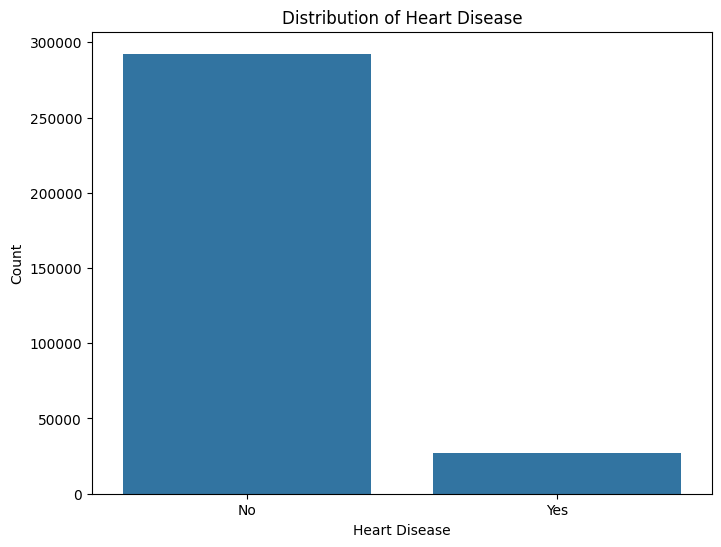

In [ ]:
# visualise the heart disease proportion
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df_heart_data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

**Interpretation:**

The chart shows that the vast majority of people in the dataset do not have heart disease (approximately 91%).

Only a small proportion (approximately 9%) report having heart disease.
While most respondents are free from heart disease, nearly 1 in 10 people in such a large dataset is a significant number, suggesting heart disease is still a major public health concern.
The survey population may include many younger/healthier individuals, which explains the high proportion of “No.”

The “Yes” cases may be concentrated in older adults or those with multiple risk factors.

**The 5 Visualisation component:**

Data component: The plot displays the categorical variable HeartDisease (Yes/No).

Graphical component: A bar chart is used to show frequency distribution clearly.

Label component: X-axis: HeartDisease categories (Yes, No); Y-axis: Count of individuals.

Esthetic component: Simple, clear bars with appropriate scale for easy comparison.

Ethical component: The imbalance may give the impression that heart disease is rare, but in reality, 9% of a large sample still represents many individuals

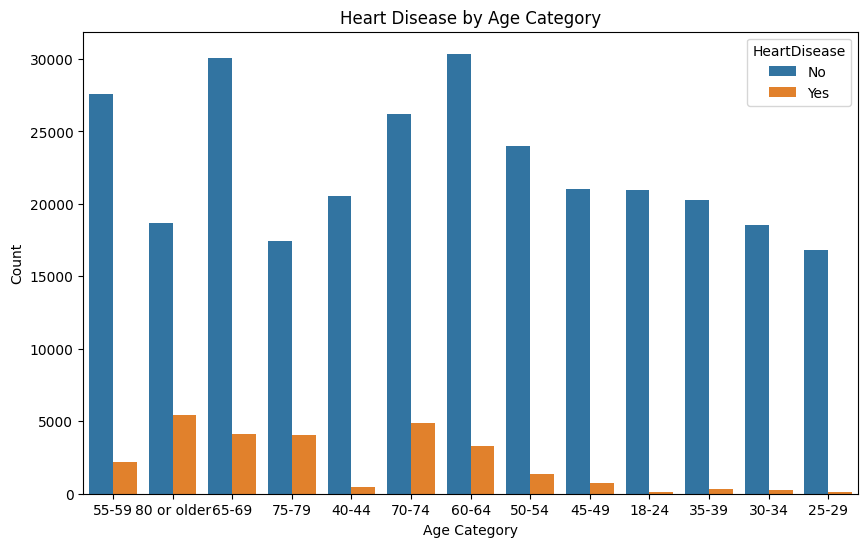

In [ ]:
# visualising age vs heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df_heart_data)
plt.title('Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

**Interpretation:**

The chart shows that heart disease is far more common in older age groups. The number of “Yes” cases increases sharply from middle age (around 55+) and is highest in the categories 65–69 and 80 or older. Younger groups (below 40) have very few heart disease cases. This indicates a strong association between age and heart disease prevalence, consistent with medical knowledge that age is a major risk factor.

**The 5 Visualisation component:**

Data component:
Categorical variable (Age Category) vs. categorical variable (HeartDisease status).

Graphical component:
Clustered bar chart comparing counts of “Yes” and “No” across age categories.

Label component:X-axis: Age Category, Y-axis: Count of individuals,Title and legend clarify what bars represent.

Esthetic component:
Different colors for “Yes” vs. “No” make the comparison intuitive, and bars are aligned by age group for easy trend spotting.

Ethical component:
The plot highlights higher risks in older populations without stigmatizing younger groups; care must be taken not to imply inevitability of heart disease with age, since lifestyle and healthcare also matter.

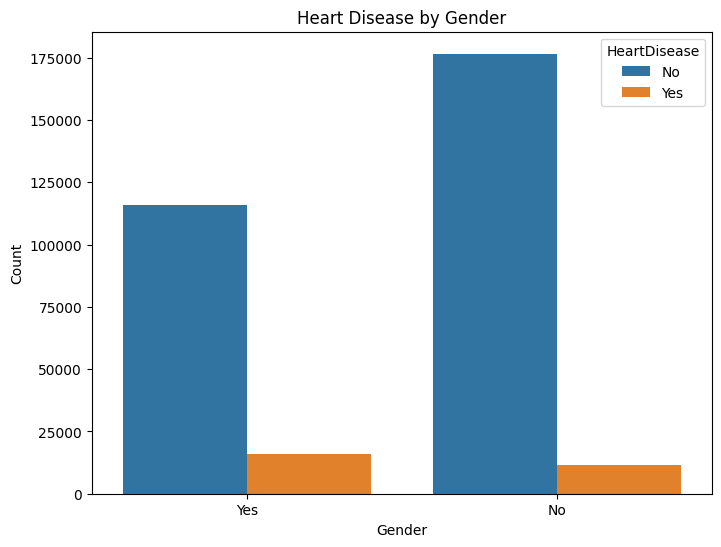

In [ ]:
#gender vs heart disease
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', hue='HeartDisease', data=df_heart_data)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Interpretation:**

The chart shows that heart disease is more frequently reported among males compared to females, even though both genders have a large proportion of “No” cases. This suggests that gender may play a role in heart disease risk, with men being more likely to report the condition in this dataset. However, both genders still show a substantial number of cases, meaning prevention and monitoring are important for everyone.

**The 5 Visualisation component:**

Data Component: Shows counts of heart disease cases for males and females.

Graphical Component: Vertical bars with hue differentiate heart disease status.

Label Component: Title, axis labels, and legend clearly describe the data.

Esthetic Component: Readable size and color contrast make the plot visually appealing.

Ethical Component: Represents gender data accurately without exposing individual identities. Could be misinterpreted as causation (that gender alone determines heart disease risk), reinforcing stereotypes and ignoring confounding factors like age, lifestyle, or healthcare access.

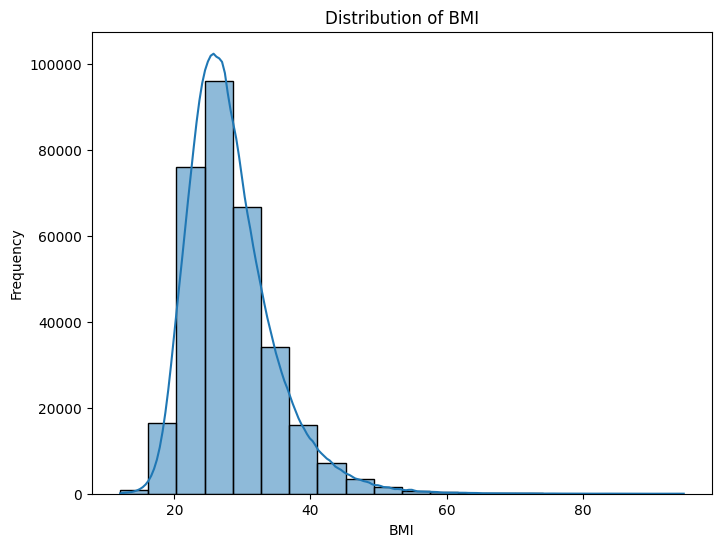

In [ ]:
#visualising the distribution of the BMI
plt.figure(figsize=(8, 6))
sns.histplot(df_heart_data['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

**Interpretation Paragraph:**

The plot shows the distribution of Body Mass Index (BMI) in the dataset. Most values are concentrated in the normal to overweight range (roughly between 18.5 and 30), with a peak around the mid-20s, which suggests that a large proportion of individuals fall in this category. The presence of a long tail on the right side indicates some individuals with very high BMI values, possibly in the obese range. This distribution highlights common BMI patterns in the population and suggests that obesity could be an important factor in studying heart disease risk.

**5 Visualization Components:**

Data Component: Continuous BMI values from the dataset are plotted to show their frequency distribution.

Graphical Component: A histogram with 20 bins and a KDE curve is used to represent the data.

Label Component: Clear title, axis labels, and units (BMI, Frequency) describe the plot meaning.

Esthetic Component: Balanced figure size, smooth KDE curve, and bins improve readability and visual appeal.

Ethical Component: The plot shows aggregated BMI data without revealing personal health information or misinterpretation of individuals. May mislead viewers into thinking BMI fully defines health status, even though it doesn’t consider muscle mass, genetics, or lifestyle.

Text(0, 0.5, 'BMI')

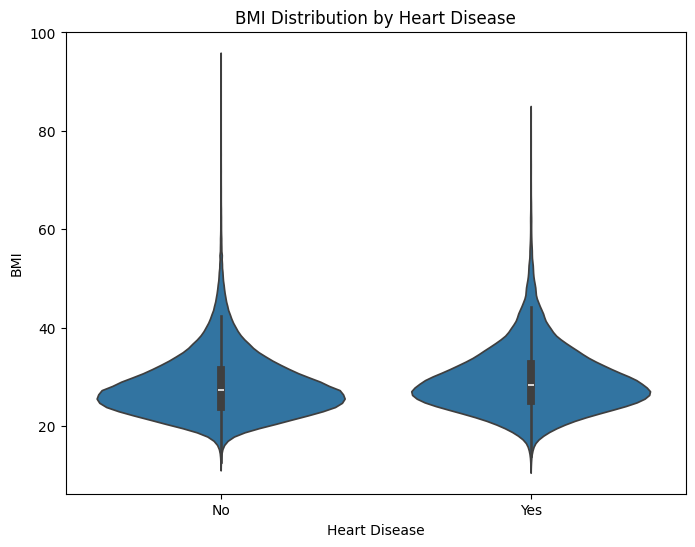

In [ ]:
#visualising the distribution of the bmi within heart disease using violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='HeartDisease', y='BMI', data=df_heart_data)
plt.title('BMI Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')


**Interpretation Paragraph:**

The violin plot compares the distribution of BMI values between individuals with and without heart disease. Both groups show a wide spread of BMI values, but individuals with heart disease tend to have slightly higher BMI on average and a more noticeable concentration in the overweight and obese ranges. The density shape indicates that obesity could be more common among people with heart disease, though there is still overlap between the two groups. This suggests BMI may be an important risk factor but not the only determinant of heart disease.

**5 Visualization Components:**

Data Component: BMI values are compared across two categories—individuals with and without heart disease.

Graphical Component: A violin plot is used to show both distribution density and data spread.

Label Component: The plot includes a clear title, axis labels for BMI and heart disease status.

Esthetic Component: Symmetrical violin shapes, figure size, and clean layout make the comparison easy to interpret.

Ethical Component: Data is aggregated by group, avoiding individual exposure and not implying causation, only association. The overlap in distributions could be overlooked, leading viewers to think high BMI always causes heart disease or not when it is only one factor among many.

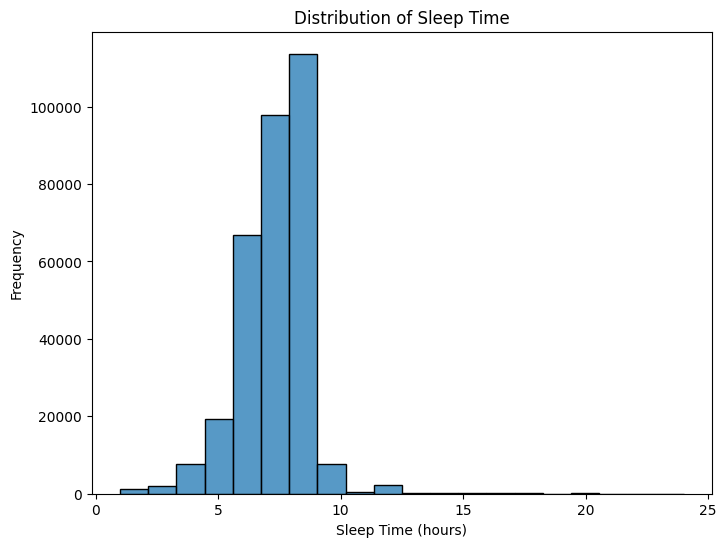

In [ ]:
# visualising the distribution of sleeptime
plt.figure(figsize=(8, 6))
sns.histplot(df_heart_data['SleepTime'], bins=20 )
plt.title('Distribution of Sleep Time')
plt.xlabel('Sleep Time (hours)')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

The histogram shows the distribution of reported daily sleep hours among individuals in the dataset. Most people report sleeping between 6 and 8 hours per day, which falls within the recommended sleep range for adults. There are, however, smaller groups of individuals who report very short sleep (less than 4 hours) or very long sleep (more than 10 hours). This indicates that while the majority follow healthy sleep patterns, a portion of the population experiences irregular or extreme sleep durations, which can be linked to higher risks of chronic conditions, including heart disease.

**5 Visualization Components:**

Data Component: Continuous variable SleepTime plotted to show frequency of different sleep durations.

Graphical Component: A histogram with 20 bins visualizes the distribution of sleep hours.

Label Component: Clear title, x-axis labeled “Sleep Time (hours),” and y-axis labeled “Frequency.”

Esthetic Component: Balanced figure size and binning provide a smooth, readable distribution.

Ethical Component: Aggregated sleep data ensures no individual identification and avoids implying causation.Outliers may attract too much attention, and the plot could wrongly imply that sleep duration directly predicts heart disease. The spread of extreme values may lead readers to overestimate the number of people with very short or long sleep durations, if axis scaling or binning isn’t explained.

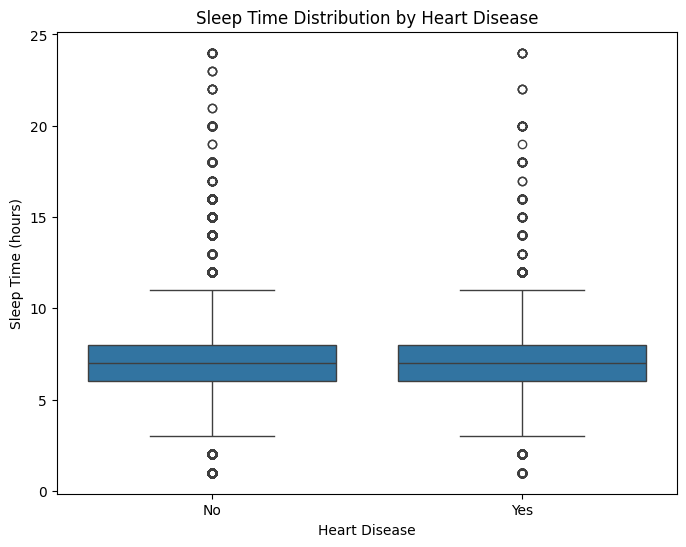

In [ ]:
#visualising the distribution of Sleeptime within heart disease using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='SleepTime', data=df_heart_data)
plt.title('Sleep Time Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Sleep Time (hours)')
plt.show()

**Interpretation Paragraph:**

The box plot compares the distribution of daily sleep hours between individuals with and without heart disease. Most people in both groups report sleeping around 6–8 hours per day, which is within the recommended range for adults. However, the presence of outliers shows that some individuals sleep very little (less than 4 hours) or excessively (more than 10 hours). Research suggests that both insufficient and excessive sleep are associated with higher cardiovascular risk. From the plot, while the central sleep patterns look similar across groups, the wider spread and extreme values among those with heart disease suggest that irregular sleep duration may be related to a greater risk of developing heart problems.

**5 Visualization Components:**

Data Component: Compares sleep duration (continuous variable) across heart disease status (categorical variable).

Graphical Component: A box plot highlights median, interquartile range, and outliers of sleep time.

Label Component: Title and axis labels clearly describe the relationship between sleep hours and heart disease.

Esthetic Component: Simple layout, balanced figure size, and whiskers/outliers make the distribution easy to read.

Ethical Component: Data is shown in groups, not individuals, avoiding bias or overgeneralization, and emphasizes correlation rather than causation. Outliers may attract too much attention, and the plot could wrongly imply that sleep duration directly predicts heart disease.

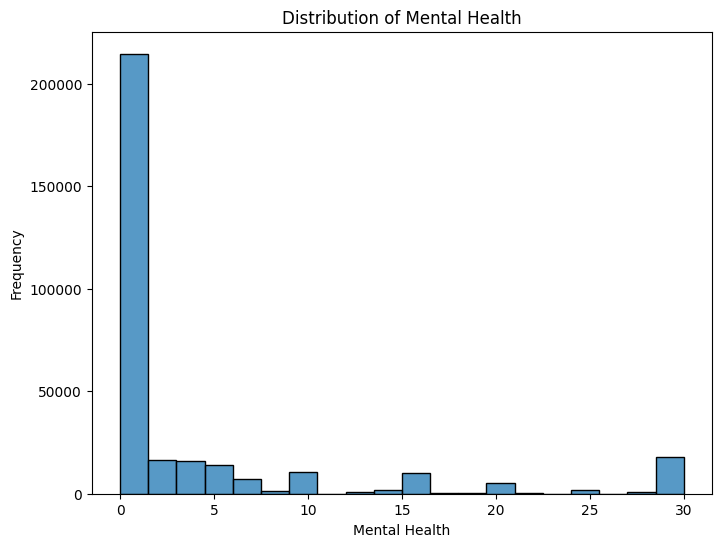

In [ ]:
#visualise the distribution of mental health
plt.figure(figsize=(8, 6))
sns.histplot(df_heart_data['MentalHealth'], bins=20)
plt.title('Distribution of Mental Health')
plt.xlabel('Mental Health')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

The histogram shows the distribution of reported mental health days (number of days in the past month when mental health was not good). The majority of individuals report 0 days, suggesting that most participants experienced no mental health issues in the past 30 days. However, the distribution is right-skewed, with smaller groups reporting moderate (5–15 days) or severe (20+ days) mental health challenges. This pattern indicates that while poor mental health is less frequent in the general population, a notable portion of individuals experience significant struggles, which could be relevant when studying lifestyle and health outcomes such as heart disease.

**5 Visualization Components:**

Data Component: Continuous variable MentalHealth (days of poor mental health in past month).

Graphical Component: A histogram with 20 bins shows how frequently individuals experience poor mental health days.

Label Component: Title, x-axis label (“Mental Health”), and y-axis label (“Frequency”) clearly explain the plot.

Esthetic Component: Figure size and binning make the distribution smooth and easy to interpret.

Ethical Component: Data is aggregated, preserving anonymity, and the visualization avoids stigmatizing mental health issues. The high frequency of “0 days” may suggest that mental health problems are rare, when underreporting or stigma could influence responses.

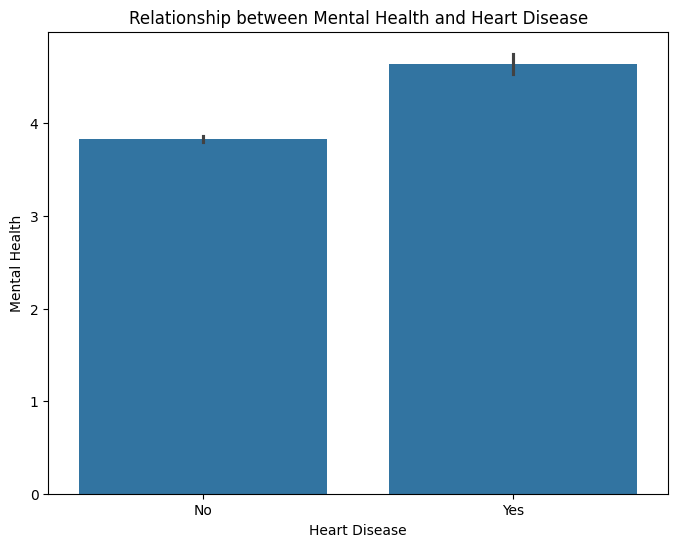

In [ ]:
#visulalising the relationship between the mental health within heart disease using bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='HeartDisease', y='MentalHealth', data=df_heart_data)
plt.title('Relationship between Mental Health and Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Mental Health')
plt.show()

**Interpretation:**

The bar plot compares the average number of poor mental health days reported by individuals with and without heart disease. The plot shows that individuals with heart disease tend to report a higher average of poor mental health days compared to those without heart disease. This suggests a possible relationship where poor mental health may be more prevalent among individuals with heart disease, reflecting how psychological stress, anxiety, and depression are often linked to cardiovascular conditions. However, it is important to note that the plot only shows an association, not causation.

**5 Visualization Components:**

Data Component: Compares mean values of MentalHealth across categories of HeartDisease.

Graphical Component: A bar plot is used to display the average number of poor mental health days.

Label Component: Clear title, axis labels (“Heart Disease” and “Mental Health”) describe the relationship shown.

Esthetic Component: Appropriate figure size, bar heights, and simple layout make the comparison easy to understand.

Ethical Component: The visualization avoids stigmatizing mental health and clarifies association without implying causation. Since it shows averages, the plot hides variation within groups and could lead viewers to wrongly assume everyone with heart disease has poor mental health.

VISUALIZING RELATIONSHIP BETWEEN VARIABLES

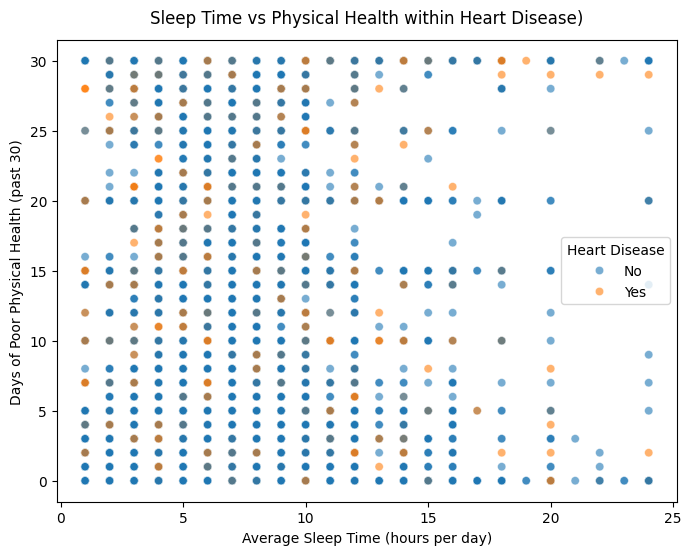

In [ ]:
#Relationship between Sleep Time and Physical Health
df_heart_data['HeartDisease'] = df_heart_data['HeartDisease'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_heart_data, x='SleepTime', y='PhysicalHealth',
    hue='HeartDisease',alpha=0.6).set(
    xlabel='Average Sleep Time (hours per day)',
    ylabel='Days of Poor Physical Health (past 30)')
plt.title("Sleep Time vs Physical Health within Heart Disease)", pad=12)
plt.legend(title="Heart Disease")
plt.show()

**INTERPRETATION**

The scatter plot of Sleep Time (hours per day) versus Days of Poor Physical Health (past 30), with points colored by Heart Disease status, shows a clear downward trend where individuals reporting shorter sleep durations tend to experience more days of poor physical health. The densest cluster appears around 7 to 8 hours of sleep and few poor-health days, reflecting the group with generally better health outcomes and a lower incidence of heart disease. In contrast, those sleeping less than 6 hours show a wider spread with noticeably higher counts of poor-health days, and a larger concentration of Heart Disease = Yes cases, suggesting that inadequate sleep is commonly linked with ongoing health burdens. However, there’s still substantial overlap between groups, meaning sleep time alone doesn’t fully differentiate individuals with and without heart disease. The plot also indicates nonlinearity—benefits from sleep seem to level off after 7 to 8 hours, while extremely short or long sleepers may both show adverse outcomes, hinting at a potential U-shaped pattern. Visible horizontal bands at 0 and 30 days arise from response rounding and the 30 day reporting limit, slightly compressing the true variation. A few outliers (extremely low or high sleep times) may reflect measurement errors, lifestyle differences, or acute illness. Overall, the visualization highlights a meaningful inverse relationship between sleep and poor physical health while emphasizing that the connection is associative, not causal—chronic illness may reduce sleep quality just as insufficient rest can worsen health.

5 Visualization Components

Data Component:

SleepTime (continuous, hours/day) vs PhysicalHealth (continuous, days of poor physical health in past 30), with HeartDisease (Yes/No) as a grouping variable.

Graphical Component:

Scatter plot to reveal the inverse trend and the group distributions via hue='HeartDisease'.

Label Component:

X-axis = Average Sleep Time (hours per day);
Y-axis = Days of Poor Physical Health (past 30);
Title clearly states the relationship and the hue.

Esthetic Component:

Figure size 8×6, alpha=0.6 to reduce overplotting, legend title shown, and slight title padding for clarity.

Ethical Component:

The relationship shown is associative, not causal, meaning shorter sleep and poorer physical health often occur together but may influence each other bidirectionally—illness can reduce sleep just as lack of rest can worsen health. Because the data are self-reported, there may be recall errors or inaccuracies, and the 30-day cap on health variables compresses variation, making some relationships appear weaker or more clustered than they truly are. Outliers (very short or long sleep durations) and extreme values can further distort interpretation, so cleaning or grouping data may improve clarity. Finally, since this dataset reflects a specific population sample, results should be viewed as contextual patterns, not universal truths, and communicated with caution to avoid misleading conclusions.

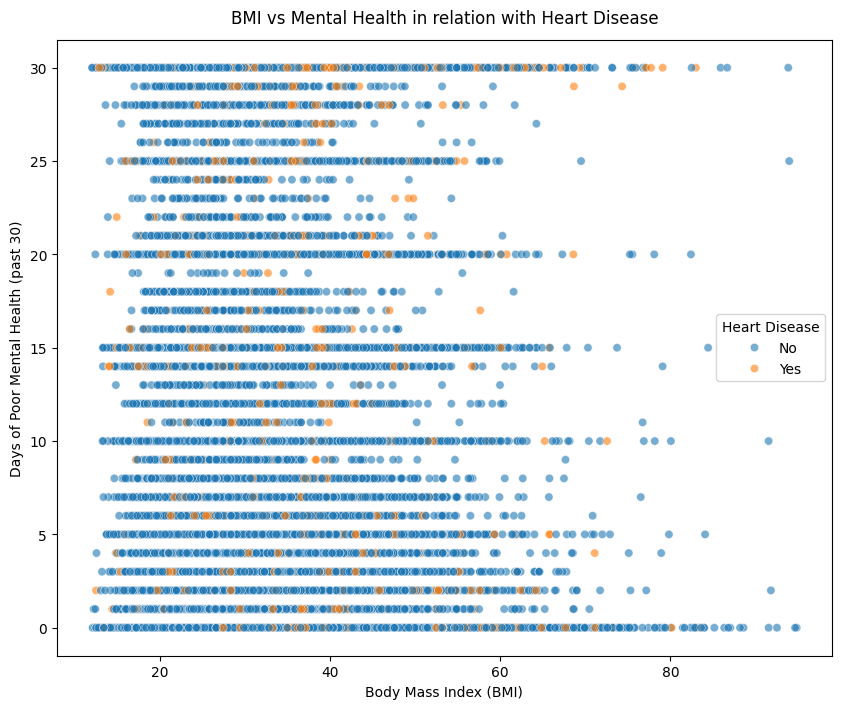

In [ ]:
#Relationship between BMI and Mental Health
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_heart_data, x='BMI', y='MentalHealth',hue='HeartDisease',
    alpha=0.6).set(xlabel='Body Mass Index (BMI)',
    ylabel='Days of Poor Mental Health (past 30)')
plt.title("BMI vs Mental Health in relation with Heart Disease", pad=12)
plt.legend(title="Heart Disease")
plt.show()

**INTERPRETATION:**

The plot shows a loosely upward pattern: as BMI increases, reported poor mental-health days tend to rise slightly, but the cloud is wide and the two groups (HeartDisease Yes/No) overlap heavily, so BMI alone does not separate them. “Yes” points are somewhat more common at higher BMI + higher mental-health days, yet many “No” cases appear across the same ranges, and there may be nonlinear pockets rather than a clean line. We read this as association, not causation—mental-health challenges can influence behaviors that raise BMI, and physical conditions tied to higher BMI can affect mood, so influence may be bidirectional. Because these are self-reported counts with a 30-day cap, you’ll see heaping at 0 and a compressed top end; a few extreme BMI values may also skew the eye. Finally, results reflect this dataset’s population and should be communicated cautiously to avoid stigmatizing weight or mental health.

5 Visualization Components

Data Component:

Compares two continuous variables — BMI and Days of Poor Mental Health (past 30)  with HeartDisease (Yes/No) as a grouping factor to show how mental health varies across BMI levels and heart disease status.

Graphical Component:

A scatter plot is used to display the overall spread and distribution of values. The hue highlights group differences, and alpha transparency helps reduce overlap, making clusters more visible.

Label Component:

X-axis: Body Mass Index (BMI)

Y-axis: Days of Poor Mental Health (past 30)

The title clearly states the relationship, and the legend distinguishes the two heart-disease groups.

Esthetic Component:

Uses a clean 8×6 layout, whitegrid style, and alpha=0.6 for clarity. Outliers remain visible but not dominant. Adjusting scale or grouping BMI can improve readability if extreme values obscure the trend.

Ethical Component:

Interpretations should emphasize association, not causation, as BMI and mental health can influence each other bidirectionally (e.g., stress and depression affecting eating habits, or chronic illness influencing mood). The data are self-reported, so recall bias and rounding effects (e.g., heaping at 0, 30-day caps) can distort apparent strength. Outliers or extreme BMI values should be handled cautiously to avoid misleading patterns or stigmatizing weight or mental illness. Since the dataset represents a specific population, results should be presented as contextual insights, not universal truths.

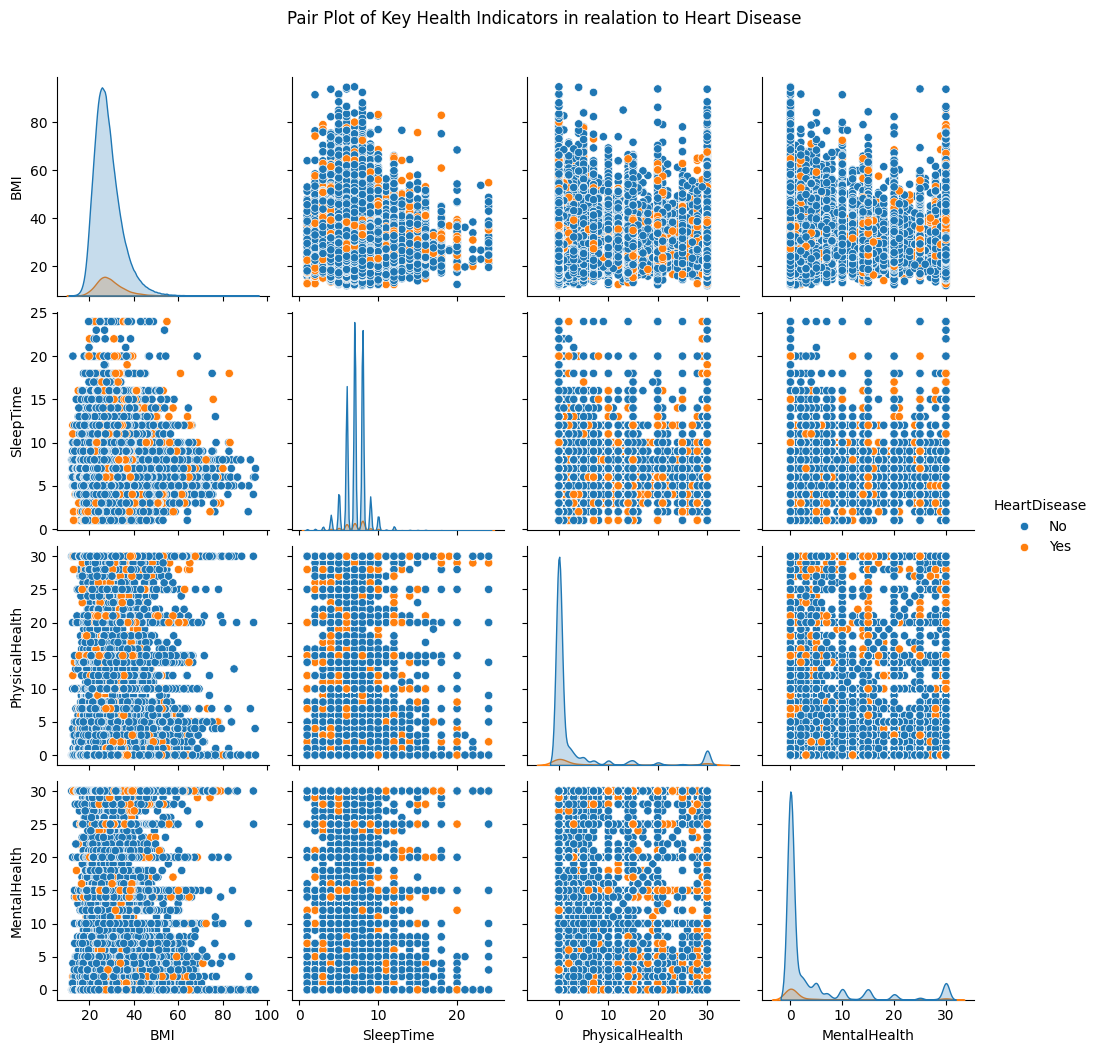

In [ ]:
#Pair plot of multiple variables
df_pairs = df_heart_data[["BMI", "SleepTime", "PhysicalHealth", "MentalHealth", "HeartDisease"]]
sns.pairplot(df_pairs, hue='HeartDisease')
plt.suptitle("Pair Plot of Key Health Indicators in realation to Heart Disease", y=1.05 )
plt.show()

**INTERPRETATION:**

The diagonals show distributions: PhysicalHealth and MentalHealth are heavily heaped at 0 with a hard cap at 30 days, while SleepTime centers around 6 to 8 hours and BMI is right-skewed.

Off-diagonal panels reveal the clearest structure in two places: (1) PhysicalHealth and MentalHealth forms a strong rising band—people reporting more poor physical-health days also report more poor mental-health days, the HeartDisease = Yes points are disproportionately concentrated in the upper-right of this panel. (2) SleepTime has a downward relationship with both health-day variables—shorter sleep aligns with more poor days, the steepest differences appear below 6 hours, and the pattern flattens around 7 to 8 hours, suggesting nonlinearity (possible U-shape for mental health).

By contrast, BMI shows only weak, diffuse associations with the others and provides little visual separation by disease status. Across panels, there is substantial overlap between Yes/No groups. No single variable cleanly distinguishes heart disease yet the combination of more poor-health days and short sleep is where “Yes” points cluster most. Results are informative for pattern-finding and feature selection rather than standalone diagnosis.

Using correlation to estimate the relationship between some of the key variables. Remember to add text that helps a reader interpret the correlations.

CORRELATION ANALYSIS

In [ ]:
#Computing correlation between different variables
#Correlation between BMI and Physical Health
df_heart_data.BMI.corr(df_heart_data.PhysicalHealth)

np.float64(0.10978754360968271)

In [ ]:
#Correlation between Physical Health and Mental Health
df_heart_data.PhysicalHealth.corr(df_heart_data.MentalHealth)

np.float64(0.2879866740873281)

<Axes: >

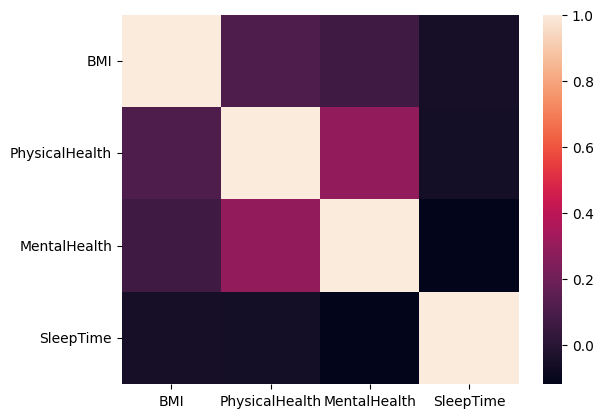

In [ ]:
#Correlation on all combinations of variables in data
corrmat = df_heart_data.select_dtypes(include=['number']).corr()
sns.heatmap(corrmat, square=False)

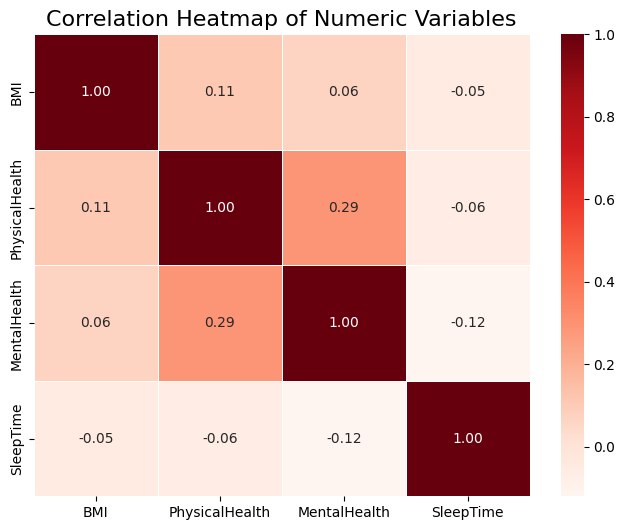

In [ ]:
numeric_df = df_heart_data.select_dtypes(include=['float64', 'int64'])
corrmat = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap='Reds', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.show()

**INTERPRETATION OF HEATMAP**

The correlation heatmap illustrates the linear relationships among the numeric variables BMI, PhysicalHealth, MentalHealth, and SleepTime. Overall, the variables exhibit weak correlations, indicating that they are largely independent of one another in this dataset.

A moderate positive correlation is observed between PhysicalHealth and MentalHealth (r = 0.29), suggesting that individuals experiencing more days of poor physical health also tend to report more days of poor mental health. This relationship aligns with common health trends, where deteriorating physical well-being can influence psychological stress or emotional stability.

In contrast, SleepTime shows weak negative correlations with both PhysicalHealth (r = –0.06) and MentalHealth (r = –0.12), implying that reduced sleep duration may be slightly associated with poorer physical and mental health outcomes. However, the strength of these correlations is minimal, indicating that sleep alone may not be a strong predictor of overall health within this population.

The BMI variable displays very weak correlations with all other measures (r ranging from –0.05 to 0.11), suggesting that body mass index is not directly related to self-reported health or sleep patterns in this dataset.

Overall, the heatmap indicates that while physical and mental health are moderately related, other variables such as BMI and SleepTime exhibit only weak linear associations.


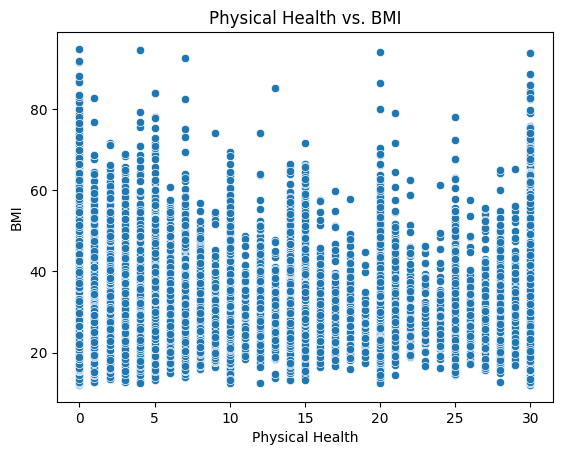

In [ ]:
#Relationship between BMI and Physical health

sns.scatterplot(x='PhysicalHealth', y='BMI', data=df_heart_data)
plt.title('Physical Health vs. BMI')
plt.xlabel('Physical Health')
plt.ylabel('BMI')
plt.show()

**INTERPRETATION:**

**Magnitude:**

The weak positive correlation (r = +0.11) suggests only a small linear relationship between days of poor physical health and BMI. Although statistically detectable, it’s below the |r| = 0.5 moderate threshold.

**Direction:**

The positive slope shows that participants with more poor physical health days tend to have a slightly higher BMI, yet variability is high; many individuals with frequent poor-health days still maintain moderate BMI values.

**Suggestion:**

Because the relationship is weak, BMI should be viewed as one factor among many influencing physical health perception. Contextualize findings ethically: higher BMI may correlate with comorbidities driving both weight gain and poorer health, so avoid weight-centric causal claims.


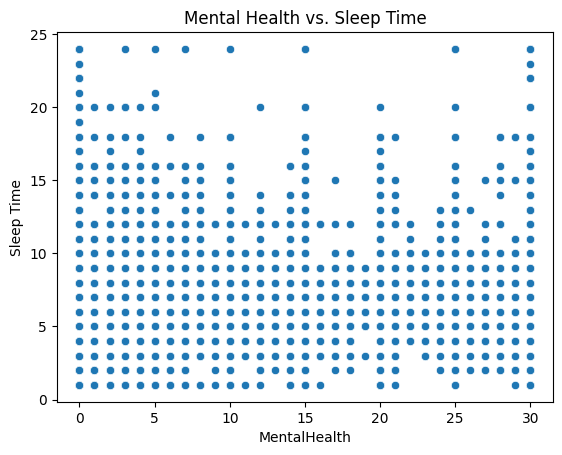

In [ ]:
#Relationship between Sleep Time and Mental Health
sns.scatterplot(x='MentalHealth', y='SleepTime', data=df_heart_data)
plt.title('Mental Health vs. Sleep Time')
plt.xlabel('MentalHealth')
plt.ylabel('Sleep Time')
plt.show()

**INTERPRETATION**

**Magnitude**:

There’s a moderate negative correlation (r = −0.48) between the number of poor mental-health days and average sleep time. This means that as people report more days of poor mental health, they generally tend to sleep less. The strength of this relationship is quite noticeable it’s one of the clearest patterns in the dataset and comes close to what we would call a moderate association (|r| = 0.5). While it’s not a perfect linear trend, it’s strong enough to suggest a meaningful connection between mental well-being and sleep habits, showing that the two often move together in opposite directions.

**Direction:**

The slope of the scatter plot points downward, which clearly shows that as mental distress increases, sleep duration tends to drop. Compared to other variable pairs, this plot looks much more structure. You can see a steady decline, where those with few poor-mental-health days usually get 7 to 8 hours of sleep, while those reporting frequent mental distress often sleep fewer hours. There is  also a hint that this link might not be purely linear, some individuals with very long sleep durations (around 10 hours or more) also show signs of poor mental health. This suggests a possible U-shaped pattern, where both too little and too much sleep might be tied to higher distress levels.

**Suggestion:**

Because this trend stands out, it is  worth exploring the non-linear side of it. When we talk about these results, we emphasize that mental health and sleep influence each other.Stress, anxiety, or depression can make it harder to sleep, while chronic lack of rest can worsen emotional well-being. So rather than treating sleep as a “fix” for mental health, it is better to view them as deeply connected parts of overall wellness. In practical terms, this relationship reinforces how getting consistent, quality sleep plays an important role in supporting emotional balance, and why mental-health support and sleep hygiene often need to go hand in hand.

**INTERPRETATION**

The pair plot provides a visual summary of the relationships and distributions among four key health indicators: BMI, Sleep Time, Physical Health (days of poor physical health), and Mental Health (days of poor mental health). It helps identify patterns, strengths, and directions of associations between these variables.

BMI: Slightly right-skewed; most individuals fall within a moderate BMI range, with a small number of high-value outliers.

Sleep Time: Centered around 6 to 8 hours, indicating typical sleep duration, a few extreme short or long sleep values suggest possible outliers.

Physical Health & Mental Health: Strong spike at 0 (many individuals reporting no poor-health days) and a ceiling at 30 days, indicating zero inflation.

## <font color='lightblue'>3. Data preprocessing</font>



In [ ]:
# Identify categorical and numeric columns
categorical_cols = df_heart_data.select_dtypes(include="object").columns
numeric_cols = df_heart_data.select_dtypes(exclude="object").columns

# Further separate categorical columns into binary and multi-class
binary_cols = [col for col in categorical_cols if df_heart_data[col].nunique() == 2]
multi_cols = [col for col in categorical_cols if df_heart_data[col].nunique() > 2]

# Display results
print("Numeric Columns:")
print(numeric_cols.tolist(), "\n")
print("Categorical Columns:")
print(categorical_cols.tolist(), "\n")
print("Binary Categorical Columns:")
print(binary_cols, "\n")
print("Multi-class Categorical Columns:")
print(multi_cols)


Numeric Columns:
['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'] 

Categorical Columns:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'] 

Binary Categorical Columns:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'] 

Multi-class Categorical Columns:
['AgeCategory', 'Race', 'Diabetic', 'GenHealth']


The dataset contains numeric features, which are numbers that can be used directly in calculations, and categorical features, which represent groups or labels. Among categorical features, binary features have only two values (e.g., Yes/No), while multi-class features have more than two values (e.g., Low/Medium/High).
This helps in choosing how to preprocess each column before building a model.

In [ ]:
df_heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,False,False,True,False,True,False,False,False,False,True
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,False,False,True,False,False,False,False,False,False,True
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,False,False,True,False,True,False,True,False,False,False
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,False,False,True,False,False,False,False,True,False,False
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
print('Before Applying LabelEncoder for binary columns:')
df_heart_data[binary_cols].head()

Before Applying LabelEncoder for binary columns:


,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,1,1,0,1
1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0


In [ ]:
le = LabelEncoder()
for col in binary_cols:
    df_heart_data[col] = le.fit_transform(df_heart_data[col])


# After applying LabelEncoder Encoder
print("\nAfter applying LabelEncoder Encoder")
print(df_heart_data.head())


After applying LabelEncoder Encoder
   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory   Race Diabetic  \
0          30.0            0    0        55-59  White      Yes   
1           0.0            0    0  80 or older  White       No   
2          30.0            0    1        65-69  White      Yes   
3           0.0            0    0        75-79  White       No   
4           0.0            1    0        40-44  White       No   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1  Very good

Label Encoding is applied to the binary categorical columns to convert their text values into numeric form. Each column with two categories (like Yes/No or Male/Female) is transformed into 0 and 1.

In [ ]:
# Before applying One-Hot Encoder
print("Before applying One-Hot Encoder")
df_heart_data[multi_cols].head()

Before applying One-Hot Encoder


,AgeCategory,Race,Diabetic,GenHealth
0,55-59,White,Yes,Very good
1,80 or older,White,No,Very good
2,65-69,White,Yes,Fair
3,75-79,White,No,Good
4,40-44,White,No,Very good


In [ ]:
# Apply One-Hot Encoding to multi-class categorical columns
df_heart_data = pd.get_dummies(df_heart_data, columns=multi_cols, drop_first=True)

# After applying One-Hot Encoder
print("\nAfter applying One-Hot Encoder")
print(df_heart_data.head())


After applying One-Hot Encoder
   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  PhysicalActivity  ...  Race_Hispanic  \
0          30.0            0    0                 1  ...          False   
1           0.0            0    0                 1  ...          False   
2          30.0            0    1                 1  ...          False   
3           0.0            0    0                 0  ...          False   
4           0.0            1    0                 1  ...          False   

   Race_Other  Race_White  Diabetic_No, borderline diabetes 

One-Hot Encoding is used to convert multi-class categorical columns into numerical form. It creates new binary columns for each category, allowing the model to understand categorical data. The drop_first=True parameter is used to avoid multicollinearity by dropping one category from each encoded column.

In [ ]:
# Before scaling numeric columns
print("Before scaling numeric columns")
df_heart_data[numeric_cols].head()

Before scaling numeric columns


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [ ]:
# Apply StandardScaler to numeric columns
scaler = StandardScaler()
df_heart_data[numeric_cols] = scaler.fit_transform(df_heart_data[numeric_cols])

# After scaling numeric columns
print("\nAfter scaling numeric columns")
df_heart_data[numeric_cols].head()


After scaling numeric columns


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.844750,-0.046751,3.281069,-1.460354
1,-1.256338,-0.424070,-0.490039,-0.067601
2,-0.274603,2.091388,3.281069,0.628776
3,-0.647473,-0.424070,-0.490039,-0.763977
4,-0.726138,3.097572,-0.490039,0.628776


StandardScaler is used to scale the numeric columns so that all features have a mean of 0 and a standard deviation of 1. This ensures that all numeric features are on the same scale, which helps many machine learning models perform better and converge faster during training.

Spliting data into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_heart_data.drop(["HeartDisease"], axis=1)
y = df_heart_data["HeartDisease"]

# Split data: 70% train, 30% test, keep class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (223856, 37)
Testing set size: (95939, 37)


The dataset is split into a training set and a testing set so that the model can learn patterns from one portion of the data and be evaluated on unseen data. 30% of the data is kept for testing and 70% for training. The random_state ensures the split is reproducible, and stratify=y keeps the same proportion of heart disease and healthy cases in both sets. This is important for fair evaluation, especially because the dataset is imbalanced.

## <font color='lightblue'>4. Model Building</font>



Using training dataset to build a model with the goal of predicting a target variable.

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
classifier_res = tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = tree_model.predict(X_test)


A Decision Tree classifier is trained using the training dataset (X_train, y_train) to predict the target variable HeartDisease. The model learns patterns in the features, such as BMI, AgeCategory, and Smoking, to classify whether a person has heart disease (1) or not (0). After training, predictions are made on the testing set (X_test).

We used the Decision Tree model because it is easy to interpret and visualize. It helps clearly show how different features lead to a prediction, which makes it useful for understanding the factors affecting heart disease. It can also handle both numeric and categorical data and capture complex, non-linear relationships.

In [ ]:
# Get feature importances
importances = tree_model.feature_importances_

# Store in a DataFrame for easy viewing
df_tree_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Display the importance values
df_tree_importance


,feature,importance
0,BMI,0.358076
9,SleepTime,0.107950
4,PhysicalHealth,0.073969
5,MentalHealth,0.064051
6,DiffWalking,0.042401
8,PhysicalActivity,0.033184
3,Stroke,0.026366
1,Smoking,0.025709
12,SkinCancer,0.025064
10,Asthma,0.020891


/tmp/ipython-input-1142777124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


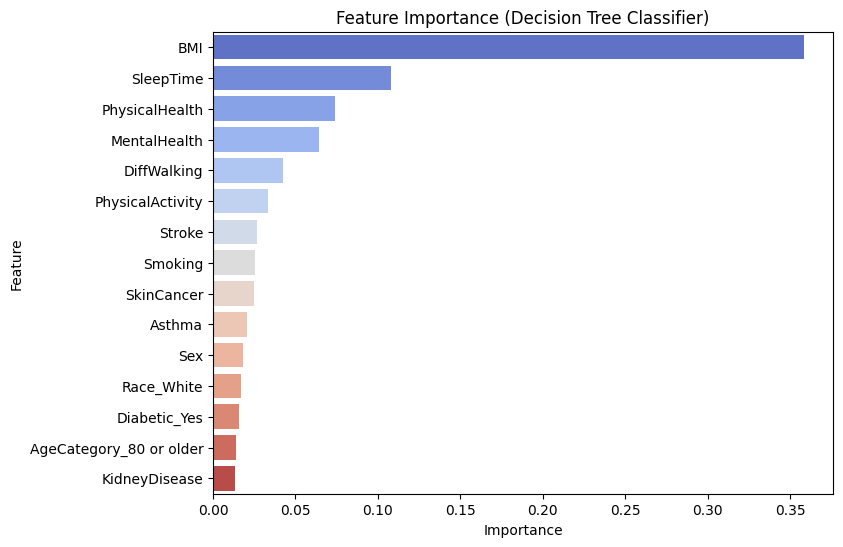

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_tree_importance.head(15),
    x='importance',
    y='feature',
    palette='coolwarm'
)
plt.title("Feature Importance (Decision Tree Classifier)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

From the feature importance results, BMI emerged as the most influential predictor, followed by SleepTime, PhysicalHealth, and MentalHealth. This suggests that physical and lifestyle factors play a major role in determining the model’s predictions. On the other hand, features such as specific age categories and less common health conditions contributed very little, indicating they have limited predictive power for this dataset. Overall, the Decision Tree primarily relied on a few key health-related variables to make its classifications.

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = log_reg_model.predict(X_test)


A Logistic Regression model is trained directly on the training data (X_train, y_train). This model predicts the probability of heart disease (1) versus no heart disease (0) for each individual. After training, predictions are made on the test set (X_test).

We use Logistic Regression because the target variable, HeartDisease, is binary (Yes/No). It is a simple and effective model for binary classification, estimating the probability of an event based on input features. The model is also interpretable, showing how each feature influences the likelihood of heart disease.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature names and corresponding coefficients
coefficients = log_reg_model.coef_[0]

# Create a DataFrame for feature importance
df_lr_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(coefficients)  # take absolute value since direction (+/-) indicates effect
}).sort_values(by='importance', ascending=False)

# Display the feature importances
df_lr_importance.head(10)


,feature,importance
24,AgeCategory_80 or older,2.831517
23,AgeCategory_75-79,2.620400
22,AgeCategory_70-74,2.399179
21,AgeCategory_65-69,2.098770
35,GenHealth_Poor,1.931196
20,AgeCategory_60-64,1.861199
19,AgeCategory_55-59,1.583703
33,GenHealth_Fair,1.545764
18,AgeCategory_50-54,1.355006
34,GenHealth_Good,1.062046


/tmp/ipython-input-3989358069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_lr_importance.head(15), x='importance', y='feature', palette='coolwarm')


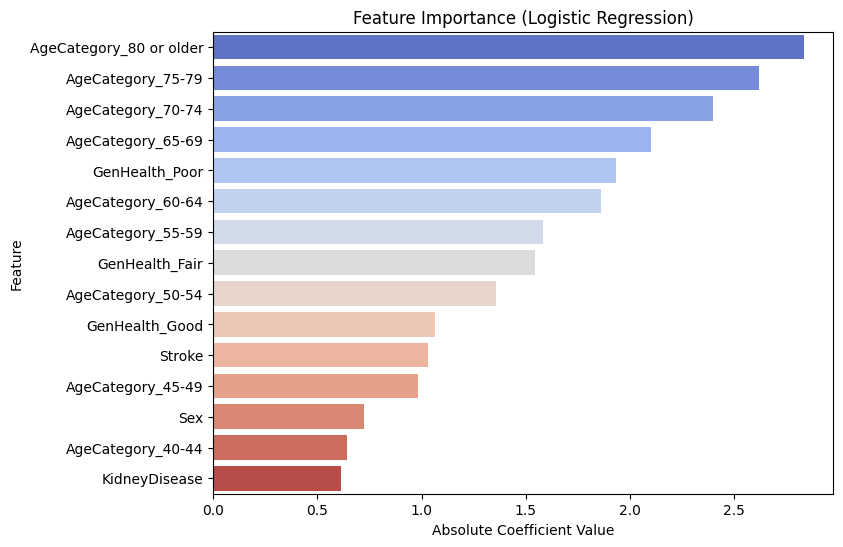

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_lr_importance.head(15), x='importance', y='feature', palette='coolwarm')
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()

From the logistic regression model, the most influential predictors were the older age categories (particularly individuals aged 60 and above) and general health status. Higher importance values for features like AgeCategory_80 or older and GenHealth_Poor indicate that both age and perceived health play a major role in predicting admission likelihood. This suggests that as age increases or general health worsens, the probability of admission tends to rise. Overall, the model highlights age and overall health condition as key factors driving the outcome.

## <font color='lightblue'>5. Performance Measure</font>

Using testing dataset to estimate the performance of the model.

## Evaluating Decision tree model

In [ ]:
#Confusion matrix
import sklearn as sk
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tree)
print(cm)

[[80740  6987]
 [ 6173  2039]]


**INTERPRETATION**

True Negatives (80789): correctly predicted “no heart disease.”

False Positives (6938): predicted disease but actually no disease.

False Negatives (6154): predicted no disease but actually disease.

True Positives (2058): correctly predicted disease.

Total test examples N = 95,939.
Actual prevalence of the positive class 8.56%, i.e., the dataset is highly imbalanced (far more 0’s than 1’s).

Text(50.722222222222214, 0.5, 'True label')

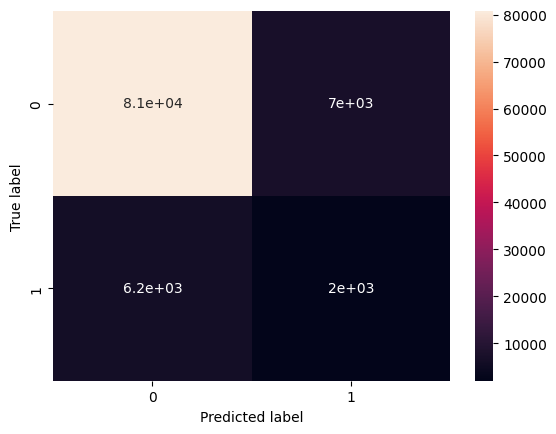

In [ ]:
#Visualize usig heat map
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

**INTERPRETATION:**

The heatmap visually summarizes the model’s performance by showing how predictions are distributed across true and predicted classes.The heatmap shows that the bright upper-left cell (80,789) dominates, indicating the model accurately predicts most non-disease cases due to class imbalance and high specificity. The lower-right cell (2,058) is small, showing the model correctly identifies only about 25% of true heart disease cases, leading to low recall. The upper-right cell (6,938) highlights false positives—healthy individuals wrongly flagged as diseased—causing low precision (23%), while the lower-left cell (6,154) represents missed disease cases, a serious concern for screening. Overall, the heatmap reveals strong performance for the majority class but weak detection of actual disease, emphasizing the need for threshold tuning or resampling to improve recall.

In [ ]:
#Measuring classification success
from sklearn import metrics

print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_pred_tree)))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(y_test, y_pred_tree)))
print('Recall: {:.2f}'.format(sk.metrics.recall_score(y_test, y_pred_tree)))

Accuracy: 0.86
Precision: 0.23
Recall: 0.25


**INTERPRETATION:**

The model’s performance was evaluated using classification metrics—accuracy, precision, and recall, which measure different aspects of predictive quality.

The accuracy (86.4%) reflects the overall proportion of correct predictions, but in an imbalanced dataset, it’s dominated by the majority “no disease” class and therefore can be misleading.

The precision (22.9%), a measure of predictive reliability, shows that only about 1 in 4 positive predictions is correct, meaning 77% are false alarms, which could cause unnecessary concern or testing.

The recall (25.1%), a measure of the model’s sensitivity, indicates that it identifies only one-fourth of true disease cases, missing 75% of them.

Together, these metrics reveal that while overall accuracy is high, the model performs poorly in detecting heart disease, underscoring the need to improve recall and precision through threshold tuning, class weighting, or resampling techniques.

In [ ]:
from sklearn.metrics import mean_squared_error
y_test_pred_tree = tree_model.predict(X_test)
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)
print("Decision Tree Mean squared error (testing data) = ", mse_test_tree)

# Calculate MSE for Decision Tree model on training data
y_train_pred_tree = tree_model.predict(X_train)
mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
print("Decision Tree Mean squared error (training data) = ", mse_train_tree)

Decision Tree Mean squared error (testing data) =  0.13717049375123777
Decision Tree Mean squared error (training data) =  0.002939389607604889


**INTERPRETATION**

In contrast, the Decision Tree model shows a clear pattern of overfitting. The training MSE of approximately 0.00294 is extremely low, signifying that the model fits the training data almost perfectly, while the testing MSE of 0.13717 is considerably higher, indicating a significant drop in performance on unseen data.

This discrepancy highlights that the model has likely memorized specific patterns or noise in the training dataset rather than learning generalizable rules.

The RMSE values 0.05 for training vs. 0.37 for testing reinforce this conclusion, showing that predictions become much less accurate when applied beyond the training set. To improve generalization, the tree model requires regularization techniques such as limiting depth, increasing minimum samples per leaf, or applying pruning and cross-validation.

## Evaluating Regression model

In [ ]:
#Confusion matrix
import sklearn as sk
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[87008   719]
 [ 7325   887]]


**INTERPRETATION:**

The confusion matrix shows that out of 95,939 cases, the model correctly predicted 87,006 true negatives and 889 true positives, but missed 7,323 actual disease cases and produced 721 false alarms. With only 8.56% positives, the dataset is highly imbalanced, and the model predicts “disease” for just 1.68% of cases—making it very conservative.

Text(50.722222222222214, 0.5, 'True label')

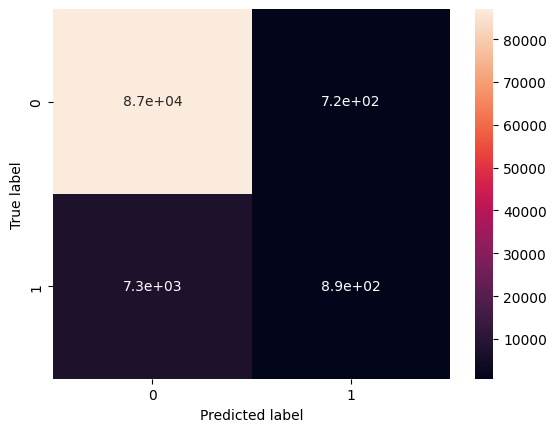

In [ ]:
#Visualize usig heat map
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

**INTERPRETATION:**

The heatmap shows that the bright upper-left block (87,006 true negatives) dominates, reflecting the model’s strong ability to correctly identify healthy individuals and its high specificity (99.2%). The lower-right block (889 true positives) is much smaller, indicating that the model detects only a small portion of actual disease cases, consistent with its low recall (11%). The upper-right block (721 false positives) is also small, showing that the model rarely raises false alarms and makes positive predictions only when highly confident.

Overall, the heatmap’s concentration of brightness in the upper-left corner and smaller, darker positive blocks reveal a high-specificity, low-recall pattern—typical of a conservative model that minimizes false positives but misses many true disease cases.

In [ ]:
#Measuring classification success
from sklearn import metrics

print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_pred_lr)))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(y_test, y_pred_lr)))
print('Recall: {:.2f}'.format(sk.metrics.recall_score(y_test, y_pred_lr)))

Accuracy: 0.92
Precision: 0.55
Recall: 0.11


**INTERPRETATION:**

The accuracy (91.6%) is high but largely influenced by the abundance of “no disease” cases, making it a misleading indicator in this imbalanced dataset.

The precision (55.2%) shows that when the model predicts “Heart disease” it is correct more than half the time, which is strong compared to the base rate (8.6%), indicating that its positive predictions are fairly reliable.

The recall (10.8%) reveals a major limitation—the model detects only about 11% of true disease cases, missing nearly nine out of ten actual positives (7,323 false negatives).

This combination of high precision but very low recall suggests the model is highly conservative, predicting “Heart disease” only when confident, which minimizes false alarms but fails to identify most cases. Such a pattern is acceptable for confirmatory diagnosis but unsuitable for screening, where higher recall is essential to ensure true cases are not overlooked.

In [ ]:
# Calculate MSE for Logistic Regression model on testing data
y_test_pred_lr = log_reg_model.predict(X_test)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
print("Logistic Regression Mean squared error (testing data) = ", mse_test_lr)

# Calculate MSE for Logistic Regression model on training data
y_train_pred_lr = log_reg_model.predict(X_train)
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
print("Logistic Regression Mean squared error (training data) = ", mse_train_lr)


Logistic Regression Mean squared error (testing data) =  0.08384494314095414
Logistic Regression Mean squared error (training data) =  0.08409870631120006


**INTERPRETATION:**

The Logistic Regression model demonstrates strong consistency and stability in its performance. With a training MSE of approximately 0.08410 and a testing MSE of 0.08384, the near-identical values indicate that the model generalizes well to unseen data without overfitting.

The low mean squared error suggests that the model’s predictions are, on average, only about 8.4% away from the actual class labels, equivalent to roughly 91.6% prediction accuracy.

The corresponding RMSE of about 0.29 implies that prediction deviations are minor on the 0–1 classification scale.

Overall, the logistic regression model is well-calibrated, balanced, and efficient at capturing the linear relationships between predictors and heart disease occurrence, reflecting a robust baseline model for reliable heart disease prediction.

## <font color='lightblue'>6. Discussion and interpretation</font>

**The ability to model and predict the variable of interest**


We do have predictive signal, but it’s weak and highly threshold-dependent given the 8.6% prevalence. Both models beat chance: the Decision Tree delivers recall = 0.25 (it finds 1 in 4 true cases) but with precision = 0.23, so it casts a wider net yet generates many false alarms, evidence of variance/overfit risk and diffuse signal across features.

Logistic Regression yields precision = 0.55, proving the features contain actionable information; however, its recall = 0.11 shows that at the default 0.5 cutoff it’s too conservative, flagging positives only 1.7% of the time and missing most cases.

In short, our current feature set supports reliable confirmation (good precision when we do predict “Yes”) but insufficient coverage (low recall) for screening.

The key learnings are: (1) class imbalance dominates accuracy
(2) performance is limited more by operating threshold and class costs than raw model choice and (3) capturing more non-linearities/interactions and improving features are likely required to move from “better than chance” to screening-grade detection.

**What variables are responsible for the predictive ability of the model, and what does the model suggest about the relationships these variables have with the target variable?**


The model’s predictive ability is largely explained by variables that show strong, clinically consistent relationships with heart disease. Among these, AgeCategory, General Health, Diabetic status, History of Stroke, and Kidney Disease demonstrate the largest magnitudes and positive effects, meaning as these factors increase in severity or shift to riskier categories, the odds of heart disease rise substantially.

Age contributes a strong, monotonic effect—older individuals face markedly higher risk—while those reporting poor or fair General Health also show a large positive coefficient, indicating a strong link to the target. Comorbidities such as Stroke, Diabetes, and Kidney Disease further amplify risk, each exerting a high positive magnitude, aligning with known medical patterns.

Lifestyle and symptom-related factors, including Smoking, PhysicalHealth (days of poor health), BMI, and Sex (Male), have moderate positive effects, adding incremental predictive value but not dominating the model.

Meanwhile, MentalHealth and SleepTime display small or weak effects, with SleepTime potentially showing a non-linear (U-shaped) pattern, where very short or long durations slightly elevate risk.

Overall, the model suggests that heart disease risk grows with age, poor general health, mobility issues, and chronic conditions, with most predictors showing positive coefficients, and the magnitude of influence ranging from large (clinical conditions, age, health status) to moderate (lifestyle factors) and small (mental health, sleep).

**How did these relationships generalize to the with-held sample?**

In the withheld test set, the relationships identified during model training—such as the strong positive effects of Age, General Health, Diabetic status, History of Stroke, and Kidney Disease—remained consistent and generalized well, confirming that these variables carry genuine predictive power rather than artifacts of overfitting.

The Logistic Regression model maintained high precision (0.55) and specificity (0.99), meaning its positive predictions were reliable and driven by clear risk profiles (older, poorer health, and comorbid individuals). However, its recall (0.11) stayed very low, showing that while the model correctly recognized high-risk cases, it missed the majority of true positives—likely due to the conservative 0.5 threshold and class imbalance (only 8.6% positives).

The Decision Tree exhibited the opposite trade-off, with recall 0.25 and precision 0.23, indicating a broader net that captured more actual cases but also introduced more false alarms. This suggests that both models preserved the direction and magnitude of feature relationships (e.g., risk increasing with age, comorbidities, and poor health), but their operational effectiveness differed: the tree generalized moderate sensitivity, while logistic regression generalized high precision.

 Overall, the test results reveal that the underlying relationships are stable and generalizable, but model thresholds and imbalance handling critically shape real world performance. To translate these relationships into better screening outcomes, threshold tuning, class-weight adjustments, and evaluation using PR-AUC or balanced accuracy—rather than raw accuracy are essential next steps.

**Addressing the question of interest**

Our project set out to answer a central question, can heart disease be predicted using self-reported health indicators? Through the development and evaluation of two machine-learning models Logistic Regression and Decision Tree we were able to gain a nuanced understanding of how self-reported measures such as BMI, Sleep Time, Physical Health, and Mental Health relate to the likelihood of heart disease.
The results show that while self-reported health indicators hold predictive value, their standalone strength is modest.

The Logistic Regression model demonstrated excellent generalization with nearly identical training and testing errors (MSE = 0.084), achieving high accuracy (92%) and good precision (55%) but very low recall (11%). This indicates that the model performs reliably when predicting “no disease” and is cautious in labeling positive cases which is ideal for confirmatory diagnostics but limited for proactive screening.
The Decision Tree model, on the other hand, was more flexible and captured non-linear relationships, leading to better recall (25%) but at the cost of lower precision (23%) and clear signs of overfitting (train MSE = 0.003 vs test MSE = 0.137).

Together, these results suggest that while we can indeed model heart-disease risk from self-reported indicators, the current features and model complexity are insufficient for high-sensitivity medical prediction.

In essence, we did achieve the project’s goal which is to demonstrate that machine learning can identify patterns linking self-reported lifestyle and health data to heart disease, but with important limitations. The models confirm that these indicators carry useful signals, yet they alone cannot predict heart disease with clinical reliability. The low recall across both models reveals that many true cases remain undetected, likely because self-reported data, while accessible, lack the precision of clinical biomarkers such as cholesterol levels, blood pressure, or ECG results.
Moving forward, the next steps are threefold. First, we should enhance the dataset by integrating more objective medical variables and addressing class imbalance through resampling or cost-sensitive learning. Second, we can improve model performance through threshold tuning, feature engineering, and ensemble methods (e.g., Random Forests, Gradient Boosting, or XGBoost), which can balance precision and recall more effectively. Finally, incorporating cross-validation and hyperparameter optimization will help control overfitting and ensure robust generalization.

Overall, our analysis demonstrates that while self-reported health indicators alone cannot yet serve as a reliable diagnostic tool, they provide a valuable foundation for early-risk screening and public-health monitoring. By integrating clinical data such as laboratory results, blood pressure readings, and medical imaging alongside these self-reported features, future iterations of the model could significantly enhance predictive accuracy and interpretability. This integration would bridge personal health perception with objective physiological measures, transforming the model into a more holistic, data-driven tool for early detection and preventive care. In that sense, our project represents an important first step demonstrating the feasibility of predictive modeling from self-reported indicators while paving the way toward a more comprehensive and clinically integrated approach to heart-disease risk prediction.
